**LAB 03**

Preparacion de datos para un modelo de machine learning

In [187]:
from scipy import stats

import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings


# Solamente para evitar warnings de la libreria seaborn
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# Semilla para obtener mismos resultados en métodos/funciones que utilicen selecciones aleatorias: "random_seed" o similar.
SEED = 1234

Lo primero que debemos hacer para preparar un dataset es cargar los datos

In [188]:
df = pd.read_csv('./Hotel Reservations.csv')

**Previsualizacion de datos**

In [189]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [190]:
len(df)

36275

In [191]:
df.shape

(36275, 19)

In [192]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [193]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Visualizacion
- Conocer la distribución de los datos, relaciones lineales o no lineales, etc.

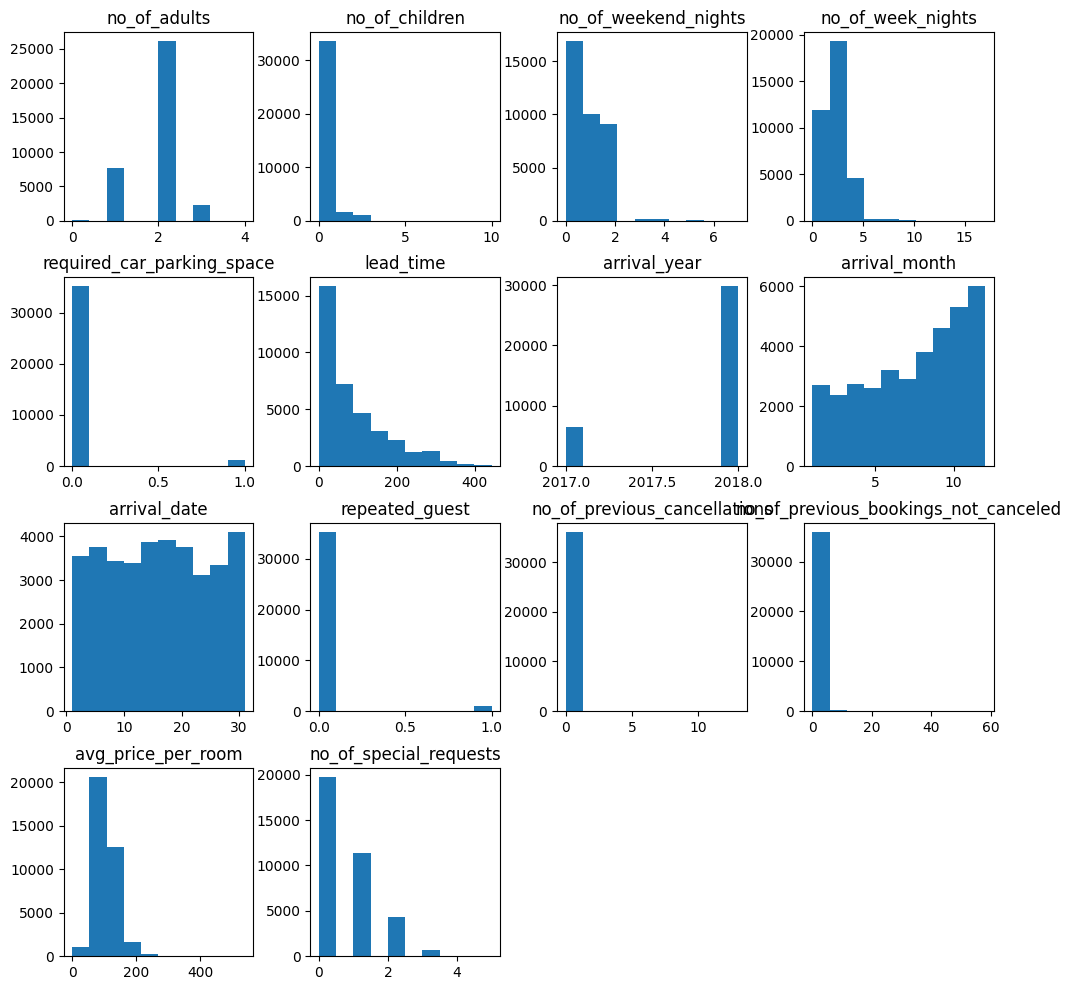

In [194]:
df.hist(layout=(4, 4), figsize=(12, 12),  grid=False);

**Limpieza de datos**

In [195]:
# isna() devuelve la comprobación de si un dato es faltante (NaN) o no con "True" o "False"
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [196]:
df[df.isna()].head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Podemos ver que en el dataset no tenemos datos faltantes

In [198]:
df.duplicated().sum()

0

Vemos que tampoco tenemos datos duplicados.

In [199]:
df.shape

(36275, 19)

Eliminamos los datos que no aportan un valor util a nuestro modelo de ML

En este caso, voy a eliminar la columna Booking_ID

In [200]:
df_cleaned = df.drop(columns=['Booking_ID'])
df_cleaned.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Codificacion de las columnas con valores categoricos

In [201]:
from sklearn.preprocessing import LabelEncoder

# Inicializar un objeto LabelEncoder
label_encoder = LabelEncoder()

# Codificar las columnas categóricas 'type_of_meal_plan' y 'room_type_reserved'
df_cleaned['type_of_meal_plan_encoded'] = label_encoder.fit_transform(df_cleaned['type_of_meal_plan'])
df_cleaned['room_type_reserved_encoded'] = label_encoder.fit_transform(df_cleaned['room_type_reserved'])
df_cleaned['market_segment_type'] = label_encoder.fit_transform(df_cleaned['market_segment_type'])
df_cleaned['booking_status'] = label_encoder.fit_transform(df_cleaned['booking_status'])



# Eliminar las columnas originales
df_cleaned = df_cleaned.drop(columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'])

# Mostrar las primeras filas del DataFrame con codificación de etiquetas
df_cleaned.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_encoded,room_type_reserved_encoded
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,3,0
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,0,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,0,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,3,0


In [202]:
# Escalamos los datos, para que nos ayude a comparar diferentes campos
# al convertirlos a un mismo o similar rango de valores

df_num = df_cleaned.select_dtypes(include=np.number)

df_num.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_encoded,room_type_reserved_encoded
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,3,0
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,0,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,0,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,3,0


In [203]:
# Normalizamos los datos

df_num_norm = (df_num-df_num.mean())/(df_num.max()-df_num.min())
df_num_norm.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_encoded,room_type_reserved_encoded
0,0.038759,-0.010528,0.027039,-0.012018,-0.030986,0.313245,-0.820427,0.234213,-0.453233,-0.025637,-0.001796,-0.002645,-0.071155,-0.123931,-0.171881,-0.118148
1,0.038759,-0.010528,0.169897,0.046806,-0.030986,-0.181112,0.179573,0.325122,-0.319900,-0.025637,-0.001796,-0.002645,0.006030,0.076069,0.828119,-0.118148
2,-0.211241,-0.010528,0.169897,-0.070841,-0.030986,-0.190141,0.179573,-0.493059,0.413433,-0.025637,-0.001796,-0.002645,-0.080414,-0.123931,-0.171881,-0.118148
3,0.038759,-0.010528,-0.115818,-0.012018,-0.030986,0.283899,0.179573,-0.220332,0.146767,-0.025637,-0.001796,-0.002645,-0.006340,-0.123931,-0.171881,-0.118148
4,0.038759,-0.010528,0.027039,-0.070841,-0.030986,-0.084046,0.179573,-0.311241,-0.153233,-0.025637,-0.001796,-0.002645,-0.016525,-0.123931,0.828119,-0.118148


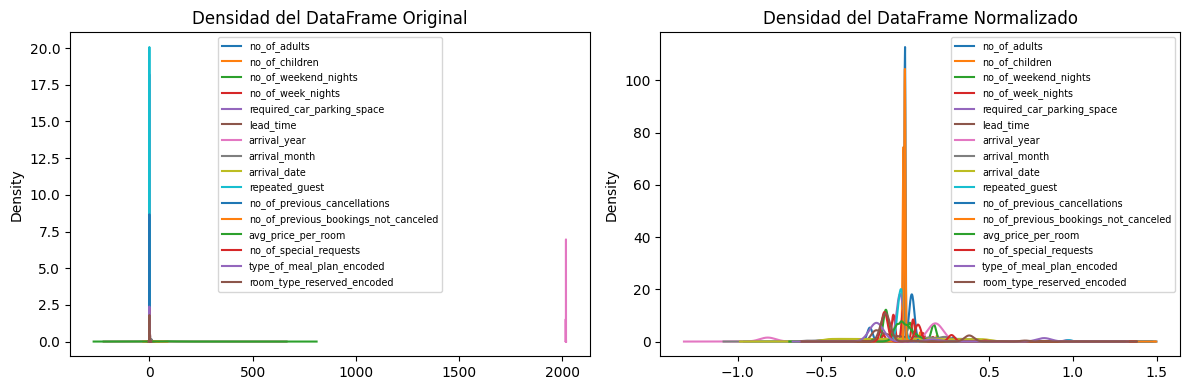

In [214]:
# Crear subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Graficar la densidad del DataFrame original
df_num.plot.density(grid=False, ax=ax[0])
ax[0].set_title('Densidad del DataFrame Original')
ax[0].legend(fontsize='x-small')

# Graficar la densidad del DataFrame normalizado
df_num_norm.plot.density(grid=False, ax=ax[1])
ax[1].set_title('Densidad del DataFrame Normalizado')
ax[1].legend(fontsize='x-small')

# Mostrar las gráficas
plt.tight_layout()
plt.show()


In [216]:
# De esta forma tendriamos nuestro dataset limpio y normalizado

df_num_norm

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_encoded,room_type_reserved_encoded
0,0.038759,-0.010528,0.027039,-0.012018,-0.030986,0.313245,-0.820427,0.234213,-0.453233,-0.025637,-0.001796,-0.002645,-0.071155,-0.123931,-0.171881,-0.118148
1,0.038759,-0.010528,0.169897,0.046806,-0.030986,-0.181112,0.179573,0.325122,-0.319900,-0.025637,-0.001796,-0.002645,0.006030,0.076069,0.828119,-0.118148
2,-0.211241,-0.010528,0.169897,-0.070841,-0.030986,-0.190141,0.179573,-0.493059,0.413433,-0.025637,-0.001796,-0.002645,-0.080414,-0.123931,-0.171881,-0.118148
3,0.038759,-0.010528,-0.115818,-0.012018,-0.030986,0.283899,0.179573,-0.220332,0.146767,-0.025637,-0.001796,-0.002645,-0.006340,-0.123931,-0.171881,-0.118148
4,0.038759,-0.010528,0.027039,-0.070841,-0.030986,-0.084046,0.179573,-0.311241,-0.153233,-0.025637,-0.001796,-0.002645,-0.016525,-0.123931,0.828119,-0.118148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0.288759,-0.010528,0.169897,0.223276,-0.030986,-0.000525,0.179573,0.052395,-0.419900,-0.025637,-0.001796,-0.002645,0.119216,0.076069,-0.171881,0.381852
36271,0.038759,-0.010528,0.027039,0.046806,-0.030986,0.322274,0.179573,0.234213,0.046767,-0.025637,-0.001796,-0.002645,-0.023099,0.276069,-0.171881,-0.118148
36272,0.038759,-0.010528,0.169897,0.223276,-0.030986,0.141687,0.179573,-0.038514,-0.486567,-0.025637,-0.001796,-0.002645,-0.009321,0.276069,-0.171881,-0.118148
36273,0.038759,-0.010528,-0.115818,0.046806,-0.030986,-0.050186,0.179573,-0.311241,0.180100,-0.025637,-0.001796,-0.002645,-0.016525,-0.123931,0.828119,-0.118148
